In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import numpy as np
import sklearn

In [3]:
gauth = GoogleAuth()           
drive = GoogleDrive(gauth)  
# read false samples
false_dict = {'name':[], 'id':[]}
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format('13yBGR5nWOgp_U-cbYSi5XZZ0Sr1JxQlj')}).GetList()
for file in file_list:

    false_dict['name'].append(file['title'])
    false_dict['id'].append(file['id'])
    
# read true samples
true_dict = {'name':[], 'id':[]}
file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format('1mUhbkiEhDEAZgfpoO85k9yNwnGDdmLR4')}).GetList()
for file in file_list:

    true_dict['name'].append(file['title'])
    true_dict['id'].append(file['id'])

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=720490533888-nr5f4brm1bg2n064me0vba96d921uqnt.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [4]:
df1 = pd.DataFrame(false_dict)
df1['label'] = 0

df2 = pd.DataFrame(true_dict)
df2['label'] = 1

# combine both dataframes
df = pd.concat([df1,df2])
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(5))

               name                                 id  label
0  Mani_false34.wav  12kOibe4t4CaSvQ4Z9aXULcJ-fQdI6WzV      0
1   Mani_false3.wav  1Apim4xhMO5p4lb65v091kIPVodCRHOIE      0
2   Maninoise26.wav  1iTxyb2YAt3U_z4k0Vq1k5oFjVmXmdQjj      1
3        Mani24.wav  1DuPdCKNguAfEWcH0iMWhNUZHtCyFSJFU      1
4  Mani_false26.wav  1uoXdnj5ONbPL5xusEbqXJNhxnz7eSpqv      0


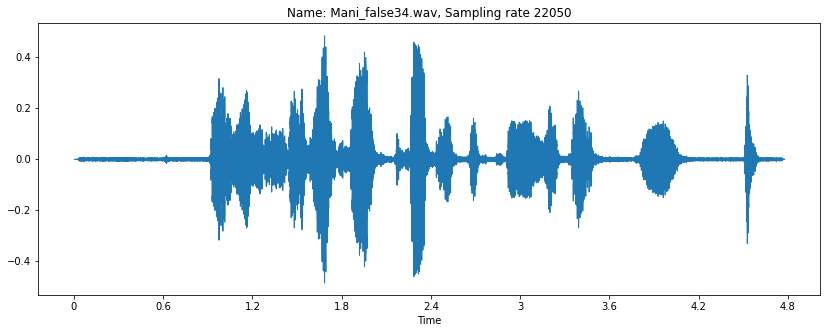

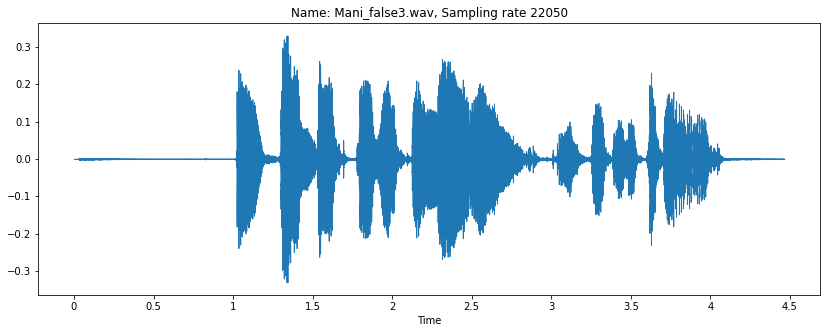

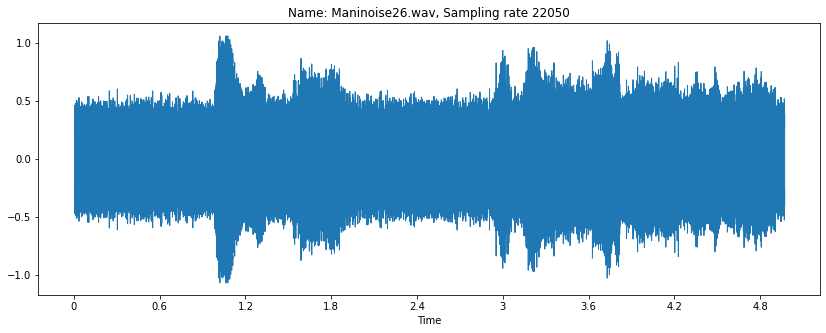

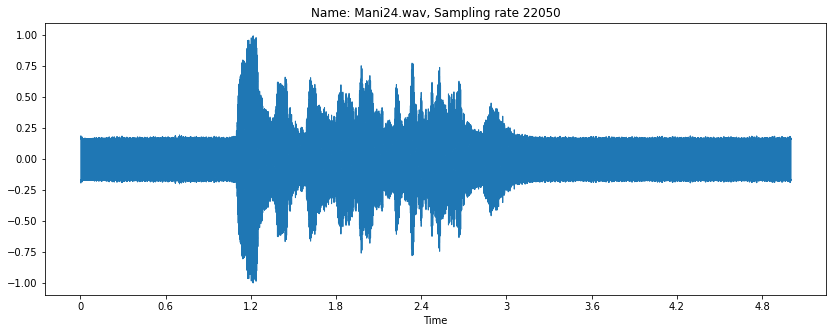

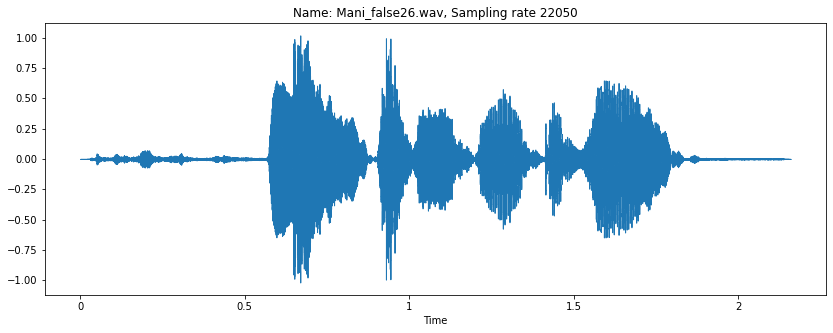

In [5]:
n = 5
for i in range(n):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
 
    x , sr = librosa.load(df.iloc[i][0])
 
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(x, sr=sr)
    plt.title('Name: '+str(df.iloc[i][0]) + ', Sampling rate ' + str(sr))
   

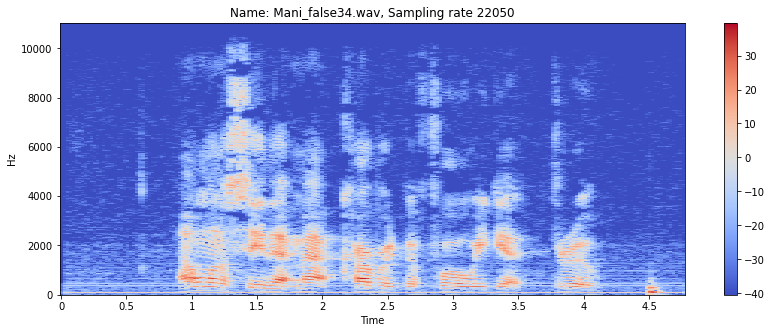

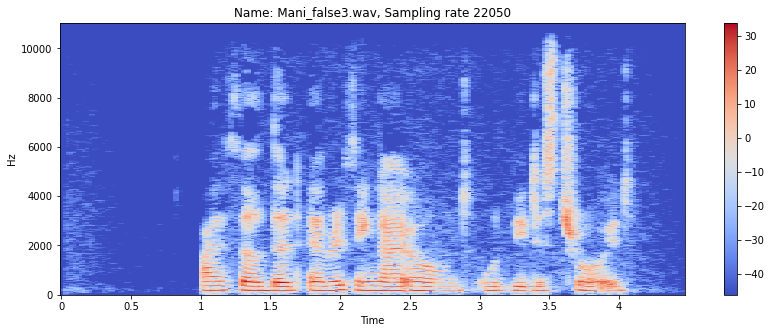

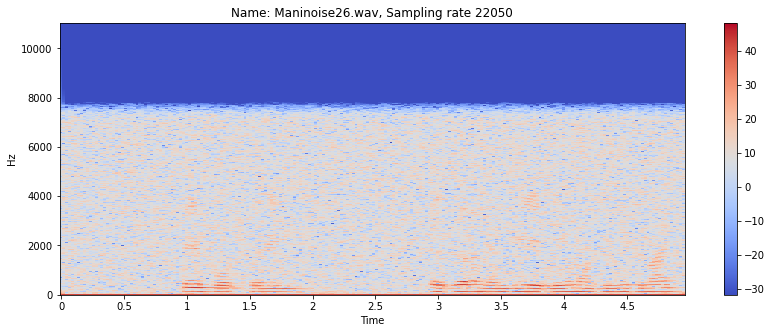

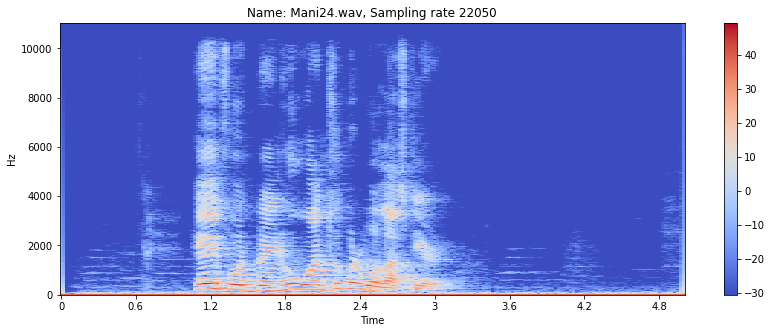

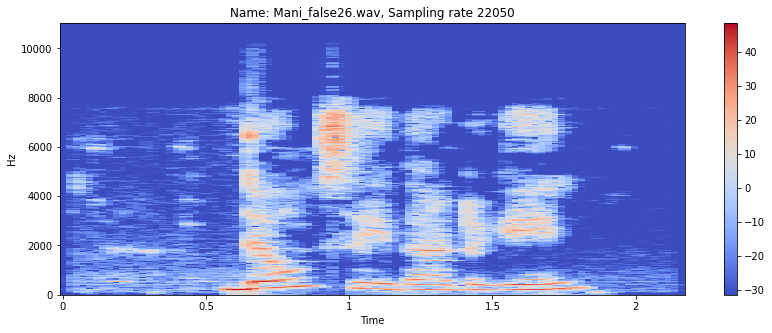

In [6]:
#Spectogram
n = 5
for i in range(n):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
    
    x , sr = librosa.load(df.iloc[i][0])
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    plt.title('Name: '+str(df.iloc[i][0]) + ', Sampling rate ' + str(sr))
    plt.colorbar()

/var/folders/xh/5cg8lrrd71530j0krmqch2l80000gn/T/ipykernel_1102/3956574219.py:12: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0813600e-05 8.0178115e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
/var/folders/xh/5cg8lrrd71530j0krmqch2l80000gn/T/ipykernel_1102/3956574219.py:12: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.1190762e-05 2.4712233e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
/var/folders/xh/5cg8lrrd71530j0krmqch2l80000gn/T/ipykernel_1102/3956574219.py:12: FutureWarning: Pass y=[-0.07410597 -0.30573958 -0.380801   ... -0.18032393 -0.06187456
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an er

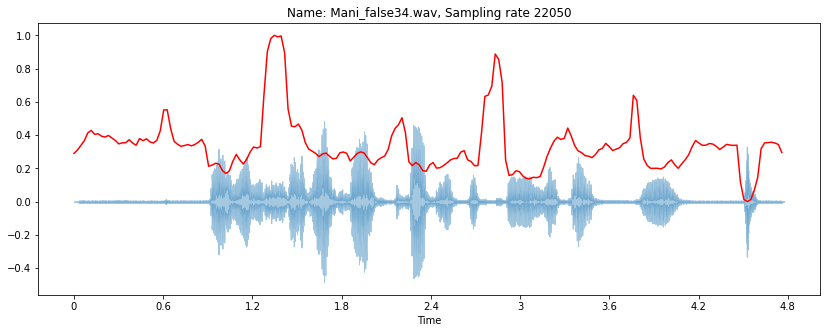

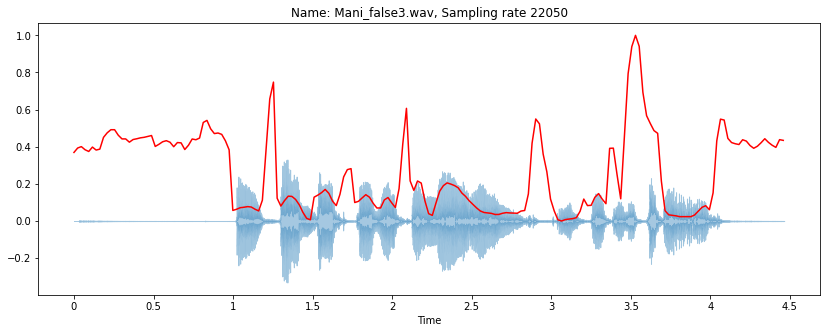

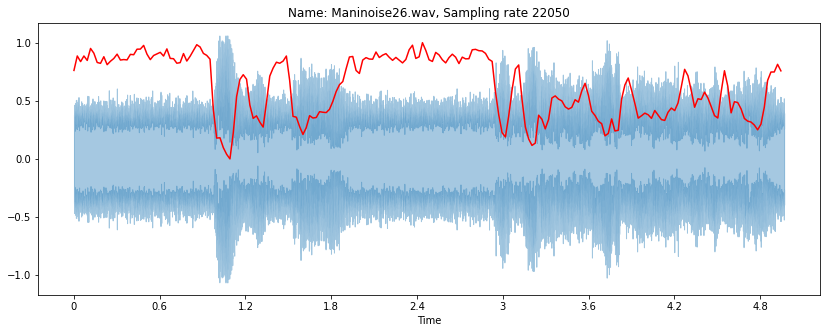

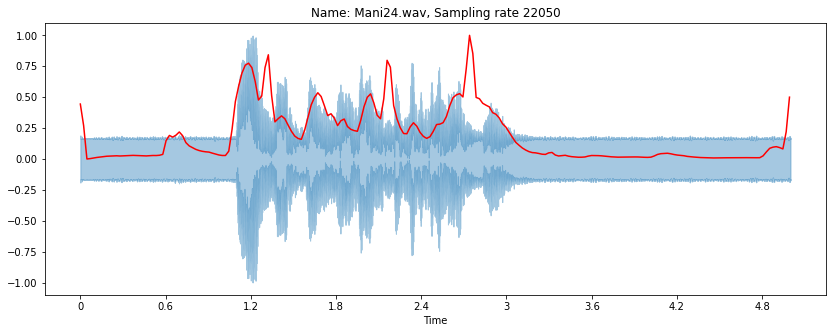

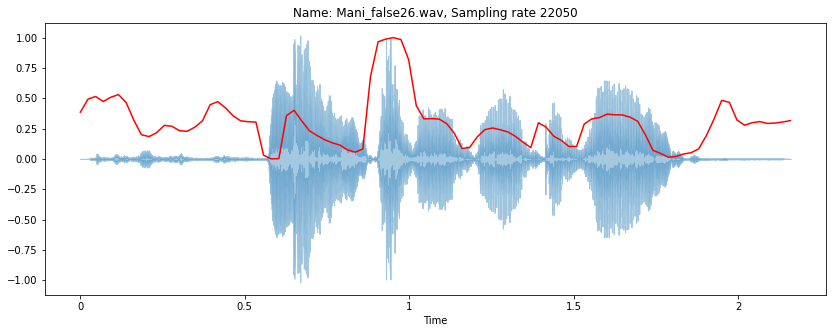

In [7]:
#spectral centroid

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

n = 5
for i in range(n):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
    
    x , sr = librosa.load(df.iloc[i][0])
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    # Computing the time variable for visualization
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    # Normalising the spectral centroid for visualisation
    plt.figure(figsize=(14, 5))
    #Plotting the Spectral Centroid along the waveform
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.title('Name: '+str(df.iloc[i][0]) + ', Sampling rate ' + str(sr))

In [11]:
feature_dict = {'rmse':[],'chroma_stft':[], 'spec_cent':[],'spec_bw':[],'rolloff':[],'zcr':[],'mfcc':[], 'label':[], 
                'rmse_min':[],'chroma_stft_min':[], 'spec_cent_min':[],'spec_bw_min':[],'rolloff_min':[],'zcr_min':[],
                'mfcc_min':[], 'rmse_max':[],'chroma_stft_max':[], 'spec_cent_max':[],'spec_bw_max':[],'rolloff_max':[],'zcr_max':[],
                'mfcc_max':[]}

for i in range(df.shape[0]):
    read_file = drive.CreateFile({'id': df.iloc[i][1]})
    read_file.GetContentFile(df.iloc[i][0])
 
    x , sr = librosa.load(df.iloc[i][0])
    rmse = librosa.feature.rms(y=x)
    chroma_stft = librosa.feature.chroma_stft(y=x, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=x, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(x)
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    label = df.loc[i]['label']
  
    # mean
    
    feature_dict['rmse'].append(np.mean(rmse))
    feature_dict['chroma_stft'].append(np.mean(chroma_stft))
    feature_dict['spec_cent'].append(np.mean(spec_cent))
    feature_dict['spec_bw'].append(np.mean(spec_bw))
    feature_dict['rolloff'].append(np.mean(rolloff))
    feature_dict['zcr'].append(np.mean(zcr))
    feature_dict['mfcc'].append(np.mean(mfcc))
    feature_dict['label'].append(np.mean(label))
 
    # min
    feature_dict['rmse_min'].append(np.min(rmse))
    feature_dict['chroma_stft_min'].append(np.min(chroma_stft))
    feature_dict['spec_cent_min'].append(np.min(spec_cent))
    feature_dict['spec_bw_min'].append(np.min(spec_bw))
    feature_dict['rolloff_min'].append(np.min(rolloff))
    feature_dict['zcr_min'].append(np.min(zcr))
    feature_dict['mfcc_min'].append(np.min(mfcc))
   
    # max
    feature_dict['rmse_max'].append(np.max(rmse))
    feature_dict['chroma_stft_max'].append(np.max(chroma_stft))
    feature_dict['spec_cent_max'].append(np.max(spec_cent))
    feature_dict['spec_bw_max'].append(np.max(spec_bw))
    feature_dict['rolloff_max'].append(np.max(rolloff))
    feature_dict['zcr_max'].append(np.max(zcr))
    feature_dict['mfcc_max'].append(np.max(mfcc))

#print(feature_dict)

In [12]:
df_model = pd.DataFrame(feature_dict)
print(df_model.head)

<bound method NDFrame.head of          rmse  chroma_stft    spec_cent      spec_bw      rolloff       zcr  \
0    0.032252     0.376287  1905.371485  1873.968098  3610.470077  0.096497   
1    0.029723     0.416580  2192.953668  1846.657642  4042.607852  0.148058   
2    0.302178     0.541859  2793.928973  2378.951198  5853.358531  0.035035   
3    0.200645     0.650068   466.772209   968.497165   870.649211  0.008927   
4    0.109407     0.290034  2218.598849  1928.438379  4120.172249  0.135399   
..        ...          ...          ...          ...          ...       ...   
115  0.163727     0.627003   600.073581  1115.822273  1249.274699  0.010267   
116  0.273962     0.630868  2907.889857  2365.499821  5913.983554  0.032849   
117  0.018095     0.377062  1687.205346  1356.449918  3000.447970  0.121277   
118  0.092536     0.344407  2111.815600  1726.559926  3838.196461  0.152570   
119  0.012801     0.350896  2339.682063  2035.623928  4390.991379  0.164266   

          mfcc  label